# This notebook collects several plotting functions that I often find myself needing to use over and over again, mainly popping up in astronomical contexts 

1. 2D cartesian plots

1.1. Scatter plot of data (x, y)

1.2. Image plot of a function f(x, y) -> z

1.3. Marginalized plot of (x, y, values) given an operation

2. Full sky plots

2.1. Scatter plot of data (x, y)

2.2. Image plot of a function f(x, y) -> z

2.3. Marginalized plot of (x, y, values) given an operation

3. Sky plot with limited field-of-view

TODO

4. Scatter plot of y and model y


In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patheffects as patheffects
from matplotlib import gridspec


import astropy.units as u

from astropy_healpix import HEALPix
from astropy.wcs import WCS
from astropy.visualization.wcsaxes.frame import EllipticalFrame
from reproject import reproject_from_healpix
from astropy.coordinates import SkyCoord

from pylab import cm
import math

import plot_utils


params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'figure.dpi': 180
          }
plt.rcParams.update(params) 

In [2]:
import importlib
importlib.reload(plot_utils)

<module 'plot_utils' from '/data/beegfs/astro-storage/groups/green/kalda/projects/templates/astro-plotting-templates/plot_utils.py'>

## Generate a dataset. Both a functional form $f(x, y)$ and a sample $x, y,$ `values` where `values` approximate the function

In [3]:
def f(x, y):
    def normal(x, sigma):
        return np.exp(-x**2/2/sigma**2)/np.sqrt(2*np.pi*sigma**2)
    
    z = normal(x - 40, 2) * normal(y + 30, 2) +\
        normal(x - 80, 2) * normal(y + 30, 2) +\
        2 * normal(x - 60, 10) * normal(y + 45, 1)
    if type(y) is np.ndarray:
        z[y<-40] *= -1
    elif y < -40:
        z *= -1
    return z
    
n = 100
m = 2*n
rng = np.random.default_rng(42)
t = np.linspace(0, np.pi, m)
l_deg = np.concatenate([
    rng.normal(40, 2.0, size=n),
    rng.normal(80, 2.0, size=n),
    rng.normal(60, 10, size=m),
])
b_deg = np.concatenate([
    rng.normal(-30, 2.0, size=n),
    rng.normal(-30, 2.0, size=n),
    rng.normal(-45, 1.0, size=m),
])
z = f(l_deg, b_deg) * rng.normal(1, 0.2, size=len(l_deg))

## 1.1 2D Cartesian scatter plot of data (x, y)

Text(0.5, 1.0, 'Scatter')

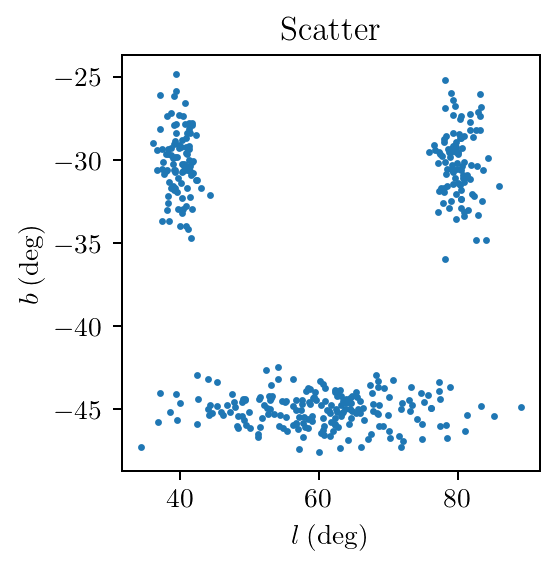

In [4]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(l_deg, b_deg, s=3)
ax.set_xlabel('$l\mathrm{\>(deg)}$')
ax.set_ylabel('$b\mathrm{\>(deg)}$')
ax.set_title('Scatter')

## 1.2 2D Cartesian plot of a function f(x, y)

(<Figure size 567x540 with 2 Axes>,
 array([<Axes: title={'center': '$f(x, y)$'}, xlabel='$l\\mathrm{\\>(deg)}$', ylabel='$b\\mathrm{\\>(deg)}$'>,
        <Axes: >], dtype=object))

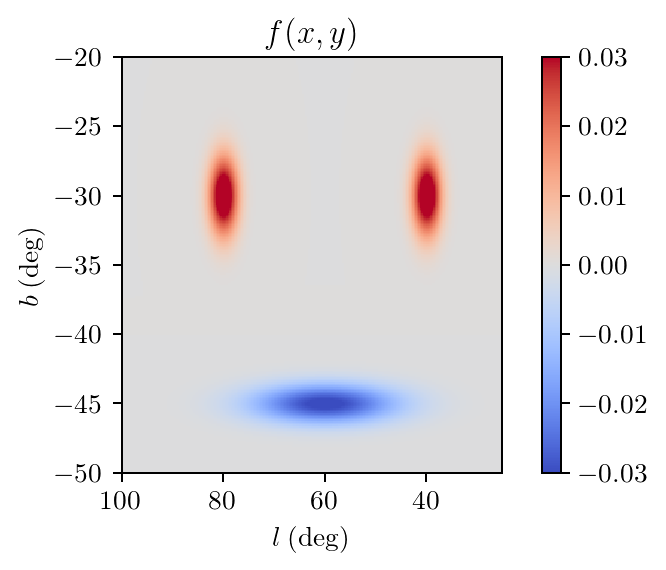

In [5]:
importlib.reload(plot_utils)
plot_utils.plot_2dfunc(f, lims=[(100, 25), (-50, -20)], cmap='coolwarm',
                       xlabel='$l\mathrm{\>(deg)}$', ylabel='$b\mathrm{\>(deg)}$',
                       title='$f(x, y)$',
                       vmin=-0.03, vmax=0.03)

## 1.3 2D Cartesian marginalized plot of (x, y, values) given an operation

(<Figure size 720x756 with 2 Axes>,
 array([<Axes: title={'center': 'Histogram'}>,
        <Axes: xlabel='$l\\mathrm{\\>(deg)}$', ylabel='$b\\mathrm{\\>(deg)}$'>],
       dtype=object))

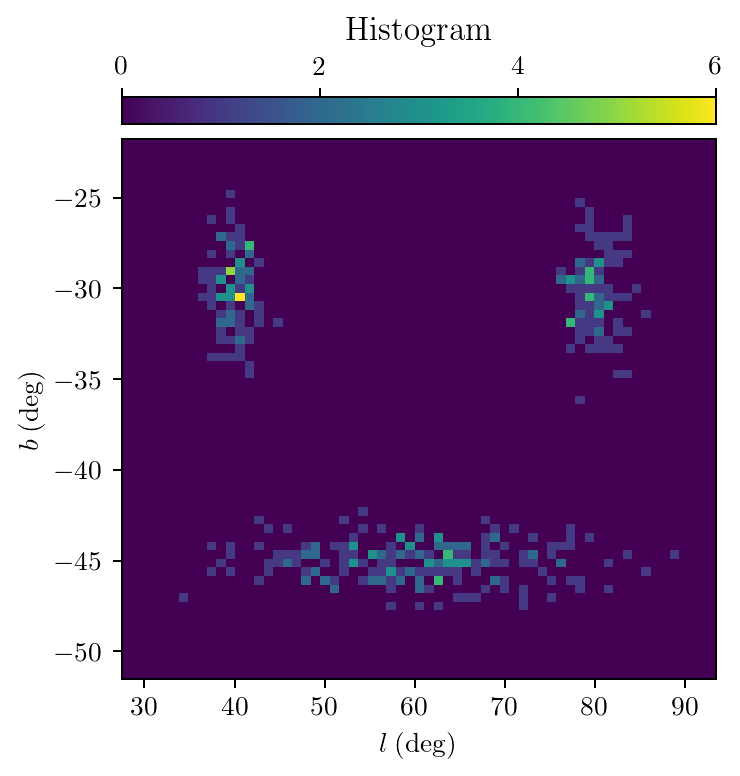

In [6]:
# Example 1
plot_utils.plot_2dhist(l_deg, b_deg, 
                       xlabel='$l\mathrm{\>(deg)}$', ylabel='$b\mathrm{\>(deg)}$',
                       title='Histogram')

(<Figure size 720x756 with 2 Axes>,
 array([<Axes: title={'center': 'mean value of z'}>,
        <Axes: xlabel='$l\\mathrm{\\>(deg)}$', ylabel='$b\\mathrm{\\>(deg)}$'>],
       dtype=object))

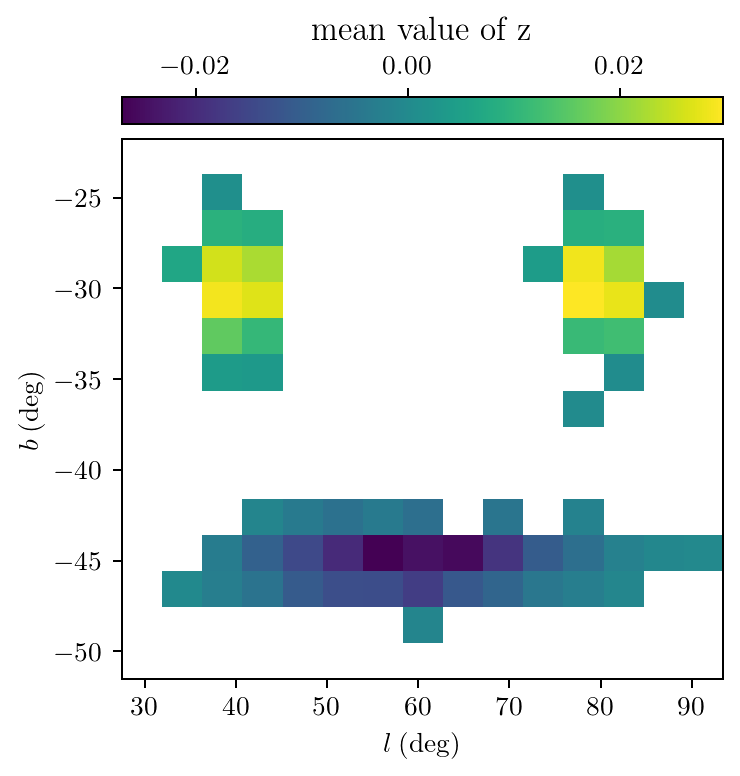

In [7]:
# Example 2
plot_utils.plot_2dhist(l_deg, b_deg, z, operation=np.mean, bins=(16, 16), 
                       xlabel='$l\mathrm{\>(deg)}$', ylabel='$b\mathrm{\>(deg)}$',
                       title='mean value of z')

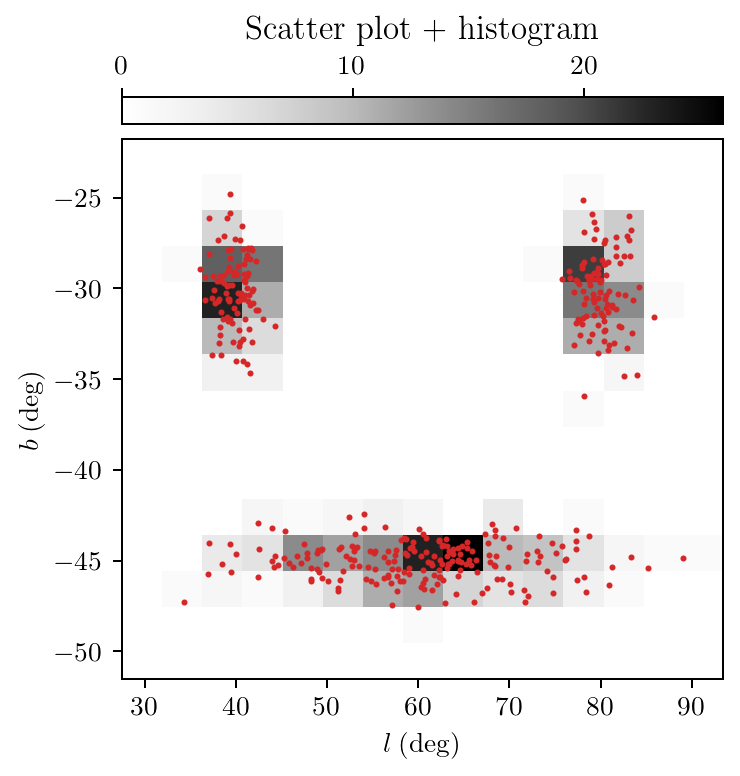

In [8]:
# Example 3. Combining scatter and histogram
fig, axs = plot_utils.plot_2dhist(l_deg, b_deg, bins=(16, 16), cmap=plt.cm.Greys,
                                  xlabel='$l\mathrm{\>(deg)}$', ylabel='$b\mathrm{\>(deg)}$',
                                  title='Scatter plot + histogram')
axs[1].scatter(l_deg, b_deg, s=2, zorder=0, color='tab:red')

## 2.1 Full sky scatter plot of data (x, y)

(<Figure size 1440x720 with 1 Axes>,
 <WCSAxes: title={'center': 'Full sky scatter plot'}>)

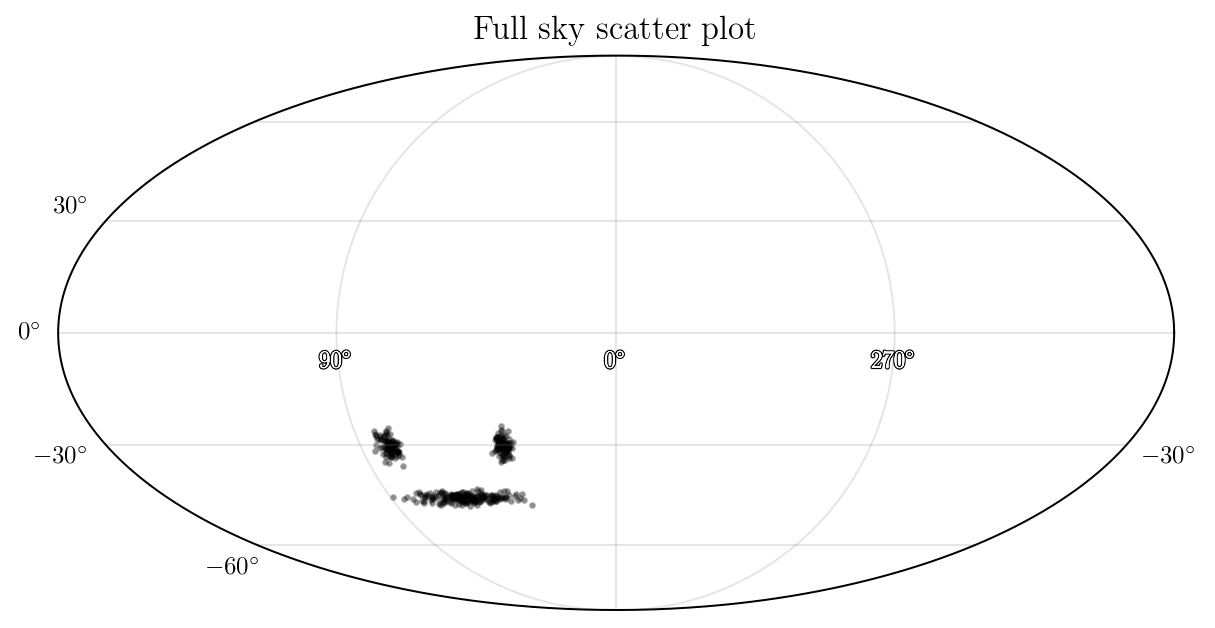

In [9]:
plot_utils.plot_mollweide_scatter(l_deg, b_deg, s=3, alpha=0.3, c='black', title='Full sky scatter plot')

## 2.2 Full sky plot of a function f(x, y)

/disk1/kalda/conda/py311/lib/python3.11/site-packages/astropy_healpix/core.py:415: RuntimeWarning: invalid value encountered in lonlat_to_healpix_ring
  healpix_index, dx, dy = func(lon, lat, nside)


(<Figure size 1467x720 with 2 Axes>,
 (<WCSAxes: title={'center': 'Full sky plot of $f(x, y)$'}>, <Axes: >))

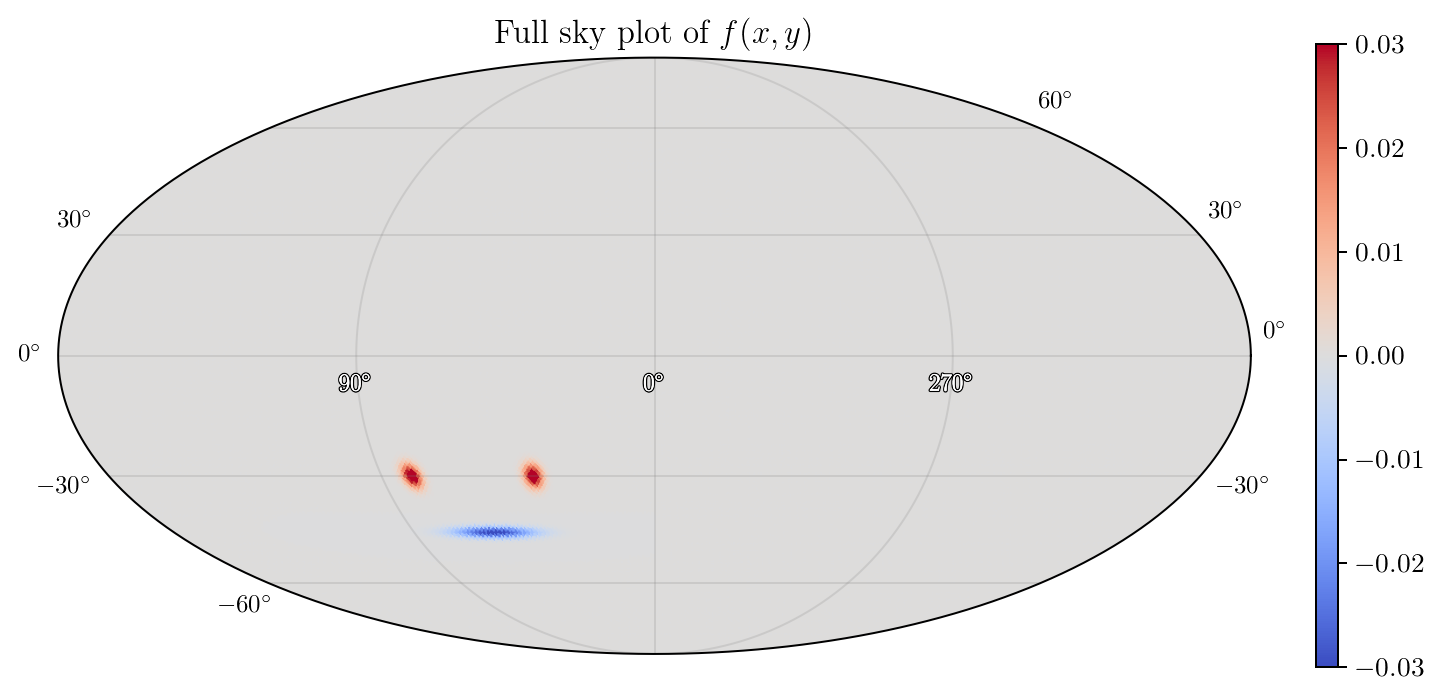

In [10]:
plot_utils.plot_mollweide_func(f, nside=64, title='Full sky plot of $f(x, y)$', imshow_kw=dict(cmap='coolwarm', vmin=-0.03, vmax=0.03))

# 1.3 Full sky marginalized plot of (x, y, values) given an operation

/disk1/kalda/conda/py311/lib/python3.11/site-packages/astropy_healpix/core.py:415: RuntimeWarning: invalid value encountered in lonlat_to_healpix_ring
  healpix_index, dx, dy = func(lon, lat, nside)


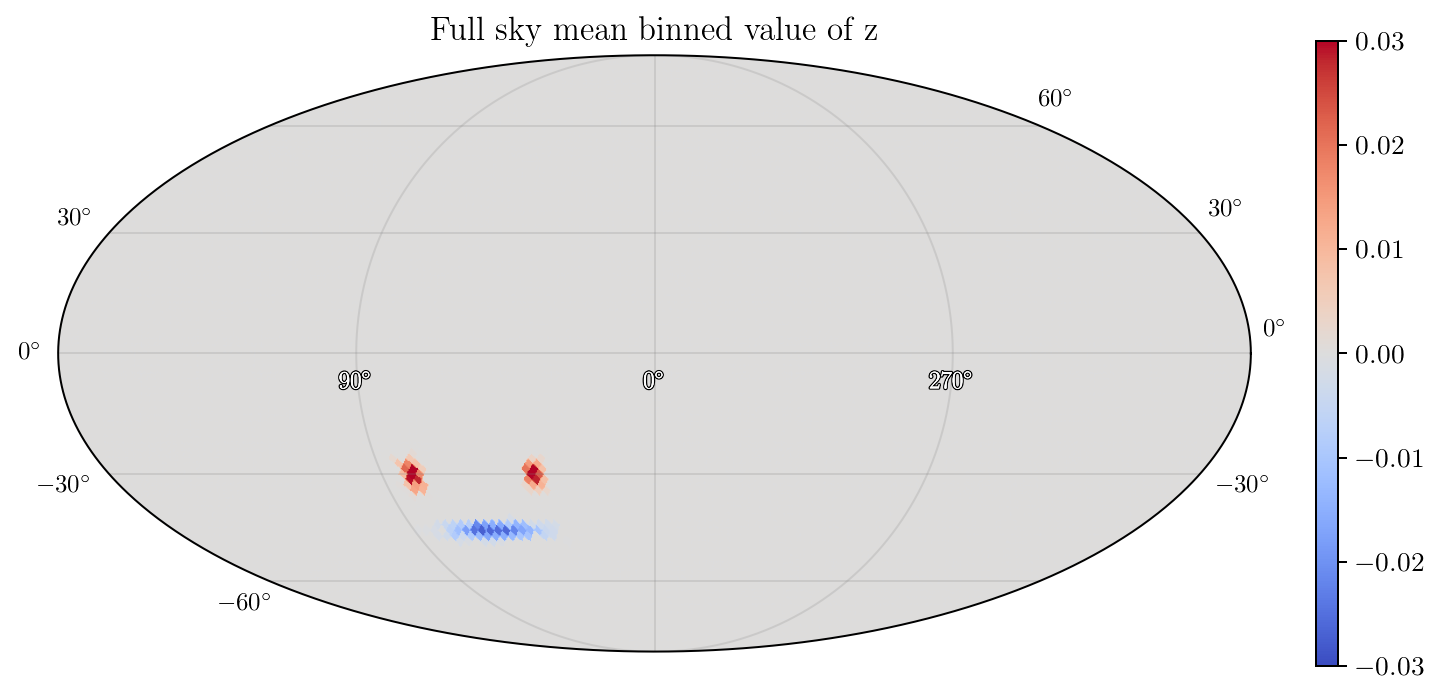

In [11]:
# Example 1
fig, axs = plot_utils.plot_mollweide_hist(l_deg, b_deg, z, operation=np.mean, title='Full sky mean binned value of z',
                                          imshow_kw=dict(cmap='coolwarm', vmin=-0.03, vmax=0.03))

/disk1/kalda/conda/py311/lib/python3.11/site-packages/astropy_healpix/core.py:415: RuntimeWarning: invalid value encountered in lonlat_to_healpix_ring
  healpix_index, dx, dy = func(lon, lat, nside)


(<Figure size 1467x720 with 2 Axes>,
 <WCSAxes: title={'center': 'Full sky histogram + random dot'}>)

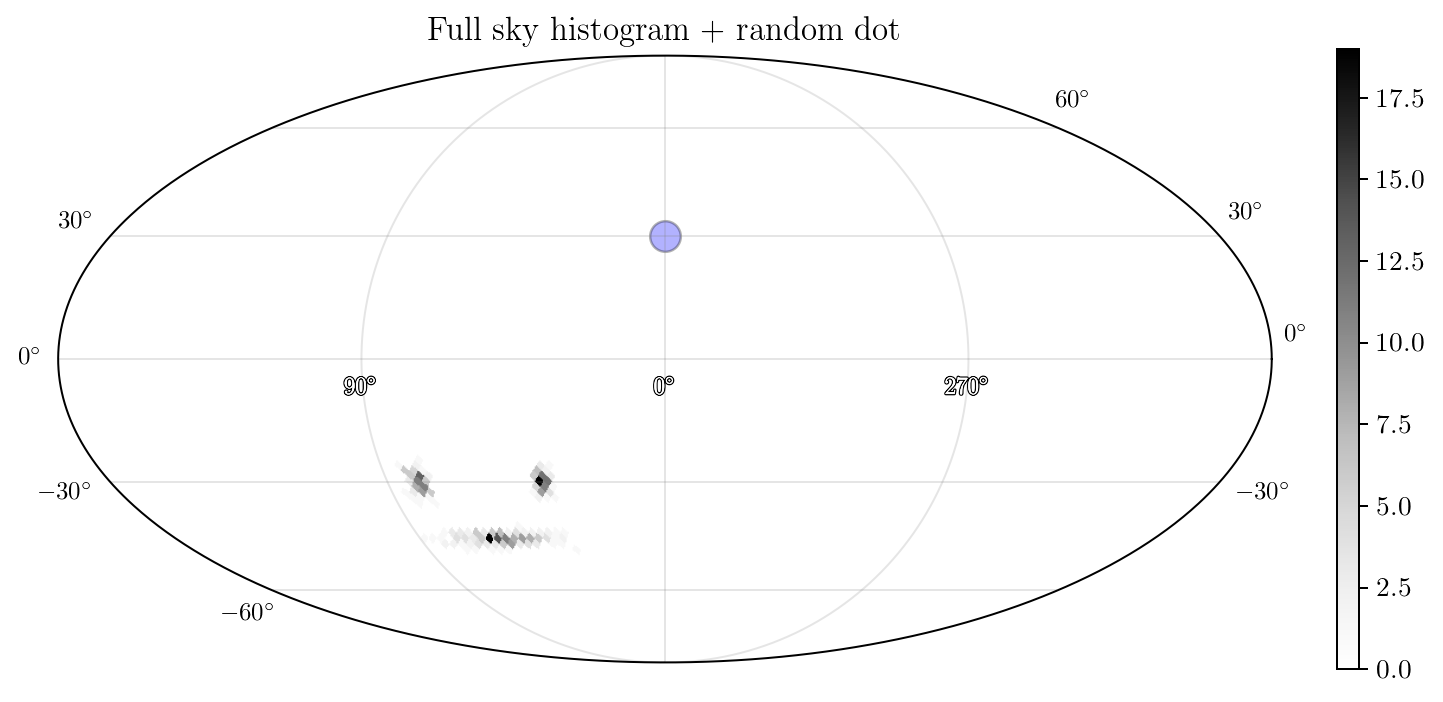

In [12]:
# Example 2
importlib.reload(plot_utils)
fig, axs = plot_utils.plot_mollweide_hist(l_deg, b_deg, title='Full sky histogram + random dot',
                                          imshow_kw=dict(cmap=plt.cm.Greys))
plot_utils.plot_mollweide_scatter([0], [30], s=150, alpha=0.3, c='blue', edgecolor='black', fig=fig, ax=axs[0])

# 3. Sky plot with limited fov. TODO 

<SkyCoord (Galactic): (l, b) in deg
    (60., -50.)>
WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-TAN'  'GLAT-TAN'  
CRVAL : 60.0  -50.0  
CRPIX : 256.5  372.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : -0.0  1.0  
CDELT : -0.12921770986448247  0.1292388910146294  
NAXIS : 512  744


/tmp/ipykernel_168738/239305360.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(


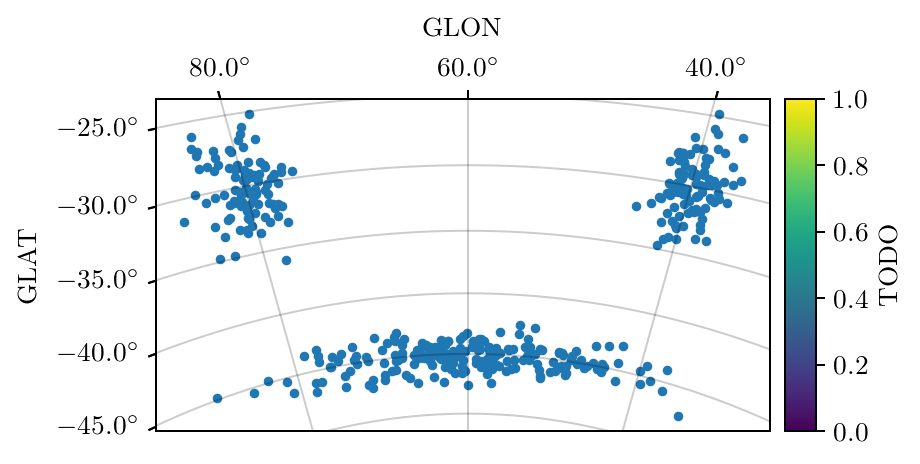

In [13]:
def tangent_wcs(center, fov, w, frame, rotation=0):
    # Determine height (in pixels) of image, based on width and fov ratio
    tan_th0 = np.tan(np.radians(fov[0]/2))
    tan_th1 = np.tan(np.radians(fov[1]/2))
    h = int(np.round(w * tan_th1 / tan_th0))

    # Coordinate frame
    coordsys,ctype0,ctype1 = {
        'galactic': ('GAL', 'GLON-TAN', 'GLAT-TAN'),
        'icrs':     ('EQU', 'RA---TAN', 'DEC--TAN')
    }[frame]

    # Rotation matrix
    th = np.radians(rotation)
    pc = [[np.cos(th), np.sin(th)],
          [-np.sin(th), np.cos(th)]]
    
    target_header = dict(
        naxis=2,
        naxis1=w,
        naxis2=h,
        ctype1=ctype0,
        crpix1=w//2+0.5,
        crval1=center[0],
        cdelt1=-np.degrees(tan_th0)/(0.5*w),
        cunit1='deg',
        ctype2=ctype1,
        crpix2=h//2+0.5,
        crval2=center[1],
        cdelt2=np.degrees(tan_th1)/(0.5*h),
        cunit2='deg',
        coordsys=coordsys,
        pc1_1=pc[0][0],
        pc1_2=pc[0][1],
        pc2_1=pc[1][0],
        pc2_2=pc[1][1]
    )
    wcs = WCS(target_header)
    return wcs


def plot_tangent(healpix_data, *subplot_args, fig=None,
                 center=(0.,0.), fov=(15.,15.), w=480,
                 input_frame='galactic', plot_frame='galactic',
                 grid_kw=dict(), **kwargs):
    wcs = tangent_wcs(center, fov, w, plot_frame)
    print(wcs)

    array, footprint = reproject_from_healpix(
        (healpix_data, input_frame),
        wcs, nested=True,
        shape_out=wcs.pixel_shape,
        order='nearest-neighbor'
    )

    if fig is None:
        figsize = (6, 2.6)
        fig = plt.figure(figsize=figsize, layout='tight')
    
    ax = fig.add_subplot(*subplot_args, projection=wcs)
    im = ax.imshow(array, **kwargs)

    pe = [
        patheffects.Stroke(linewidth=1.0, foreground='white', alpha=0.7),
        patheffects.Normal()
    ]

    # coord0,coord1 = {'galactic':('glon','glat'), 'icrs':('ra','dec')}[plot_frame]
    kw = dict(color='gray', alpha=0.2)
    kw.update(**grid_kw)
    ax.coords.grid(**kw)
    # ax.coords[coord0].set_ticklabel(color='k', path_effects=pe, fontsize=7)
    # ax.coords[coord1].set_ticklabel(color='k', path_effects=pe, fontsize=7)
    # ax.coords[coord1].set_ticklabel_position('v')
    # ax.coords[coord0].set_ticks_visible(False)
    # ax.coords[coord1].set_ticks_visible(False)

    return fig, ax, im


def get_wcs_coordimage(wcs):
    idx_y,idx_x = np.indices(wcs.array_shape)
    return wcs.pixel_to_world(idx_x, idx_y)


def wcs_project_points(wcs, coord0, coord1):
    img_pix_idx = wcs.all_world2pix(coord0, coord1, 0)
    for idx in img_pix_idx:
        idx[~np.isfinite(idx)] = -1

    idx_oob = (
        (img_pix_idx[0] < 0)
      | (img_pix_idx[1] < 0)
      | (img_pix_idx[0] >= wcs.pixel_shape[0])
      | (img_pix_idx[1] >= wcs.pixel_shape[1])
    )

    idx_proj = np.where(~idx_oob)[0]
    xy_proj = [i[idx_proj] for i in img_pix_idx]

    return xy_proj, idx_proj

regions = {
    'LMC': {
        'coords': SkyCoord(60., -50., unit='deg', frame='galactic'),
        'fov': (60., 80.),
        'rotation': 0
    }
}

region_name = 'LMC'
center_coords = regions[region_name]['coords']
fov = regions[region_name]['fov']
rot = regions[region_name].get('rotation', 0.)
plot_frame = center_coords.frame.name
if plot_frame == 'galactic':
    x0, y0 = center_coords.l.deg, center_coords.b.deg
elif plot_frame == 'icrs':
    x0, y0 = center_coords.ra.deg, center_coords.dec.deg
coord0, coord1 = {'galactic':('glon','glat'), 'icrs':('ra','dec')}[plot_frame]

proj = tangent_wcs(
    (x0, y0),
    fov,
    512, # width (pixels)
    plot_frame,
    rotation=rot
)

mark = regions[region_name].get('mark', {})

print(center_coords)
print(proj)

xy_proj, idx_proj = wcs_project_points(
    proj, l_deg, b_deg
)

coord_img = get_wcs_coordimage(proj)


fig = plt.figure(figsize=(5, 4), layout='compressed')
gs = gridspec.GridSpec(
    1, 2, figure=fig,
    width_ratios=[2,0.1]
)

ax = fig.add_subplot(gs[0,0], projection=proj, aspect='equal')
cax = fig.add_subplot(gs[0,1])

sc = ax.scatter(
    xy_proj[0], xy_proj[1],
    cmap='coolwarm_r',
    s=160/np.sqrt(len(idx_proj)), # Constant total area covered by dots
    rasterized=True
)

#im = ax.imshow(sfd_img, origin='lower', norm=LogNorm(), cmap='binary')

# for m in mark:
#     x,y = proj.all_world2pix(mark[m].ra.deg, mark[m].dec.deg, 0)
#     ax.scatter([x], [y], marker='+', c='lightgreen', s=36, alpha=1, label=m)

fig.colorbar(sc, cax=cax, orientation='vertical', label=r'TODO')

ax.coords[coord0].set_ticks_position('t')
ax.coords[coord0].set_ticklabel_position('t')
ax.coords[coord0].set_axislabel_position('t')
ax.coords[coord1].set_ticks_position('l')
ax.coords[coord1].set_ticklabel_position('l')
ax.coords[coord1].set_axislabel_position('l')
ax.coords[coord0].set_major_formatter('d.d')
ax.coords[coord1].set_major_formatter('d.d')
ax.coords[coord0].set_axislabel(f'$\mathrm{{{coord0.upper()}}}$')
ax.coords[coord1].set_axislabel(f'$\mathrm{{{coord1.upper()}}}$')
ax.coords[coord0].set_major_formatter('d.d')
ax.coords[coord1].set_major_formatter('d.d')
ax.coords.grid(color='k', alpha=0.2, linestyle='solid')

# fig.add_axes([0,0,1,1], zorder=-1)
plt.show()

# 4. Scatter plot of y and model y

(<Figure size 900x540 with 1 Axes>,
 <Axes: title={'center': 'residual plot of y and y_pred'}, xlabel='$y$', ylabel='$y - y_\\mathrm{pred}$'>)

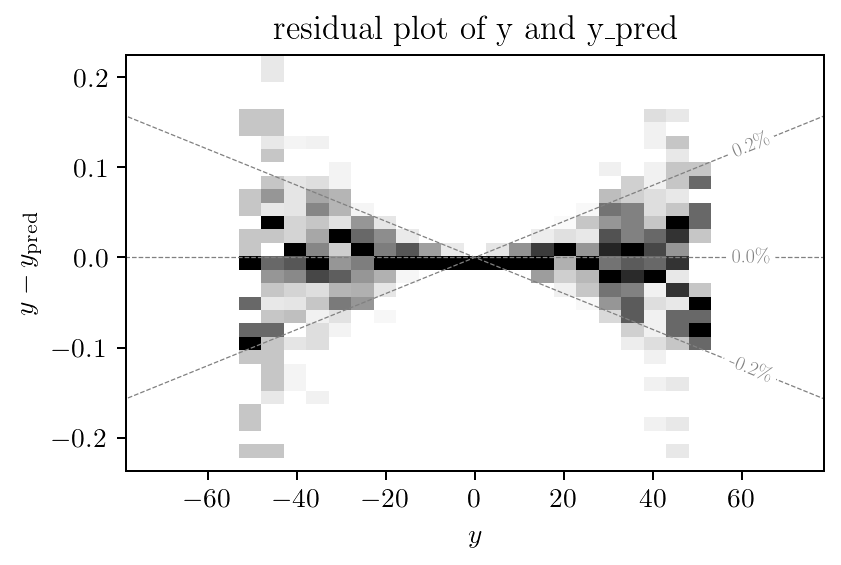

In [14]:
# Example 1
n = 1000
x = np.linspace(-10, 10, n)
y = 5*x
y_pred = 5*x + np.random.normal(0, 0.1, n)*x**2/100

plot_utils.plot_residual_y_ypred(y, y_pred, slopes=[0, 0.002], title='residual plot of y and y_pred')